In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler,PowerTransformer,QuantileTransformer,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import folium
from folium.plugins import MarkerCluster

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Dataset Bottle**

In [2]:
dataset = pd.read_csv('/content/drive/My Drive/BCML/datasets/bottle.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset['T_degC'].value_counts().sum()
#IncTim,DIC Quality Comment,Sta_ID,Depth_ID yang object

853900

In [5]:
print(pd.array(dataset.dtypes))

<PandasArray>
[  dtype('int64'),   dtype('int64'),       dtype('O'),       dtype('O'),
   dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
   dtype('int64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), dtype('float64'),       dtype('O'),
 dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'),
 dtype('float64'), dtype('float64'), 

In [6]:
dataset.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

In [7]:
dataset.describe(include=['O'])

,Sta_ID,Depth_ID,IncTim,DIC Quality Comment
count,864863,864863,14437,55
unique,2634,864850,199,37
top,090.0 045.0,20-16045S-MX-110-1421-06670900-0100A-3,12/30/1899 05:45:00,CTD Bottle Misfire; DIC sample compromised. C...
freq,10043,2,325,9


In [8]:
nulls = dataset.isnull().sum().sort_values(ascending = False)
prcet = round(nulls/len(dataset)*100,2)

dataset_null = pd.DataFrame(columns =  ['Attr','Total','Percent'])
dataset_null.Attr  = nulls.index
dataset_null.Total = nulls.values
dataset_null.Percent = prcet.values
print(dataset_null.head(70))

                   Attr   Total  Percent
0                   pH2  864853   100.00
1   DIC Quality Comment  864808    99.99
2                   pH1  864779    99.99
3                  DIC2  864639    99.97
4                   TA2  864629    99.97
..                  ...     ...      ...
65               T_degC   10963     1.27
66               RecInd       0     0.00
67              R_Depth       0     0.00
68               R_PRES       0     0.00
69               Depthm       0     0.00

[70 rows x 3 columns]


In [9]:
for i in dataset_null.Attr[dataset_null['Percent'] > 30]:
    dataset = dataset.drop([i], axis=1)

In [10]:
dataset.dtypes

Cst_Cnt          int64
Btl_Cnt          int64
Sta_ID          object
Depth_ID        object
Depthm           int64
T_degC         float64
Salnty         float64
O2ml_L         float64
STheta         float64
O2Sat          float64
Oxy_µmol/Kg    float64
RecInd           int64
T_prec         float64
S_prec         float64
P_qual         float64
Chlqua         float64
Phaqua         float64
NH3q           float64
C14A1q         float64
C14A2q         float64
DarkAq         float64
MeanAq         float64
R_Depth        float64
R_TEMP         float64
R_POTEMP       float64
R_SALINITY     float64
R_SIGMA        float64
R_SVA          float64
R_DYNHT        float64
R_O2           float64
R_O2Sat        float64
R_PRES           int64
dtype: object

In [11]:
dataset.isnull().sum().sort_values()
#IncTim,DIC Quality Comment,Sta_ID,Depth_ID yang object

Cst_Cnt             0
R_Depth             0
RecInd              0
Depthm              0
R_PRES              0
Btl_Cnt             0
Depth_ID            0
Sta_ID              0
T_degC          10963
R_TEMP          10963
T_prec          10963
C14A2q          16240
C14A1q          16258
DarkAq          24423
MeanAq          24424
R_POTEMP        46047
R_DYNHT         46657
S_prec          47354
R_SALINITY      47354
Salnty          47354
STheta          52689
R_SVA           52771
R_SIGMA         52856
NH3q            56564
R_O2           168662
O2ml_L         168662
P_qual         191108
R_O2Sat        198415
O2Sat          203589
Oxy_µmol/Kg    203595
Phaqua         225693
Chlqua         225697
dtype: int64

In [12]:
dataset.dropna(subset=['T_degC'],inplace=True,axis=0)
dataset.isnull().sum().sort_values()

Cst_Cnt             0
R_TEMP              0
R_Depth             0
T_prec              0
RecInd              0
R_PRES              0
Btl_Cnt             0
Depthm              0
Depth_ID            0
Sta_ID              0
T_degC              0
C14A1q          14641
C14A2q          14643
DarkAq          21754
MeanAq          21755
R_POTEMP        35084
R_DYNHT         39264
R_SALINITY      39653
Salnty          39653
S_prec          39653
STheta          41726
R_SVA           41808
R_SIGMA         41893
NH3q            56564
O2ml_L         162613
R_O2           162613
R_O2Sat        189870
P_qual         190840
O2Sat          192626
Oxy_µmol/Kg    192632
Phaqua         222605
Chlqua         222609
dtype: int64

In [13]:
dataset.drop(['Depth_ID','Sta_ID','Btl_Cnt','Cst_Cnt'],axis=1,inplace=True)
dataset.isnull().sum().sort_values()

Depthm              0
R_TEMP              0
R_Depth             0
T_prec              0
RecInd              0
R_PRES              0
T_degC              0
C14A1q          14641
C14A2q          14643
DarkAq          21754
MeanAq          21755
R_POTEMP        35084
R_DYNHT         39264
S_prec          39653
R_SALINITY      39653
Salnty          39653
STheta          41726
R_SVA           41808
R_SIGMA         41893
NH3q            56564
O2ml_L         162613
R_O2           162613
R_O2Sat        189870
P_qual         190840
O2Sat          192626
Oxy_µmol/Kg    192632
Phaqua         222605
Chlqua         222609
dtype: int64

In [14]:
for i in dataset.columns:
    if dataset[i].isnull().sum() > 0:
        dataset[i].fillna(dataset[i].mean(), inplace=True)

In [15]:
dataset.isnull().sum().sort_values()

Depthm         0
R_O2           0
R_DYNHT        0
R_SVA          0
R_SIGMA        0
R_SALINITY     0
R_POTEMP       0
R_TEMP         0
R_Depth        0
MeanAq         0
DarkAq         0
C14A2q         0
C14A1q         0
NH3q           0
Phaqua         0
Chlqua         0
P_qual         0
S_prec         0
T_prec         0
RecInd         0
Oxy_µmol/Kg    0
O2Sat          0
STheta         0
O2ml_L         0
Salnty         0
T_degC         0
R_O2Sat        0
R_PRES         0
dtype: int64

In [16]:
dataset.describe()

,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,T_prec,S_prec,P_qual,Chlqua,Phaqua,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
count,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000,853900.00000,853900.000000,853900.000000,853900.000000,853900.000000,853900.000000
mean,228.503218,10.799677,33.841337,3.382852,25.819394,57.103779,148.808694,4.701617,2.017148,2.719339,8.999995,8.999846,8.999842,8.946948,8.999992,8.999992,8.999992,8.999992,228.503769,10.799697,10.842295,33.841282,25.81101,220.938918,0.432876,3.382883,57.116767,230.078442
std,316.870919,4.243825,0.450790,1.865594,1.138898,32.643176,79.365486,1.876766,0.148498,0.438765,0.003247,0.010657,0.010821,0.495035,0.002863,0.002863,0.002863,0.002863,316.870662,4.243829,4.148492,0.451902,1.09671,91.166442,0.373667,1.865607,32.687015,320.288945
min,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,3.000000,1.000000,2.000000,6.000000,8.000000,8.000000,4.000000,8.000000,8.000000,8.000000,8.000000,0.000000,1.440000,0.000000,4.570000,20.93400,0.400000,0.000000,-0.010000,-0.100000,0.000000
25%,48.000000,7.680000,33.501000,1.860000,25.012000,31.000000,88.759400,3.000000,2.000000,2.000000,9.000000,8.999846,8.999842,9.000000,9.000000,9.000000,9.000000,9.000000,48.000000,7.680000,7.850000,33.501000,25.00000,146.000000,0.148000,1.860000,30.900000,48.000000
50%,125.000000,10.060000,33.841337,3.382852,25.897000,57.103779,148.808694,3.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,125.000000,10.060000,10.350000,33.841282,25.89000,212.400000,0.362000,3.382883,57.116767,126.000000
75%,300.000000,13.880000,34.181000,5.250000,26.621000,89.062500,226.493100,7.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,300.000000,13.880000,13.740000,34.181000,26.61500,295.500000,0.620000,5.250000,89.200000,302.000000
max,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,7.000000,3.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,5351.000000,31.140000,31.140000,37.034000,250.78400,683.400000,3.880000,11.130000,214.100000,5458.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc758291cc0>,
      dtype=object)

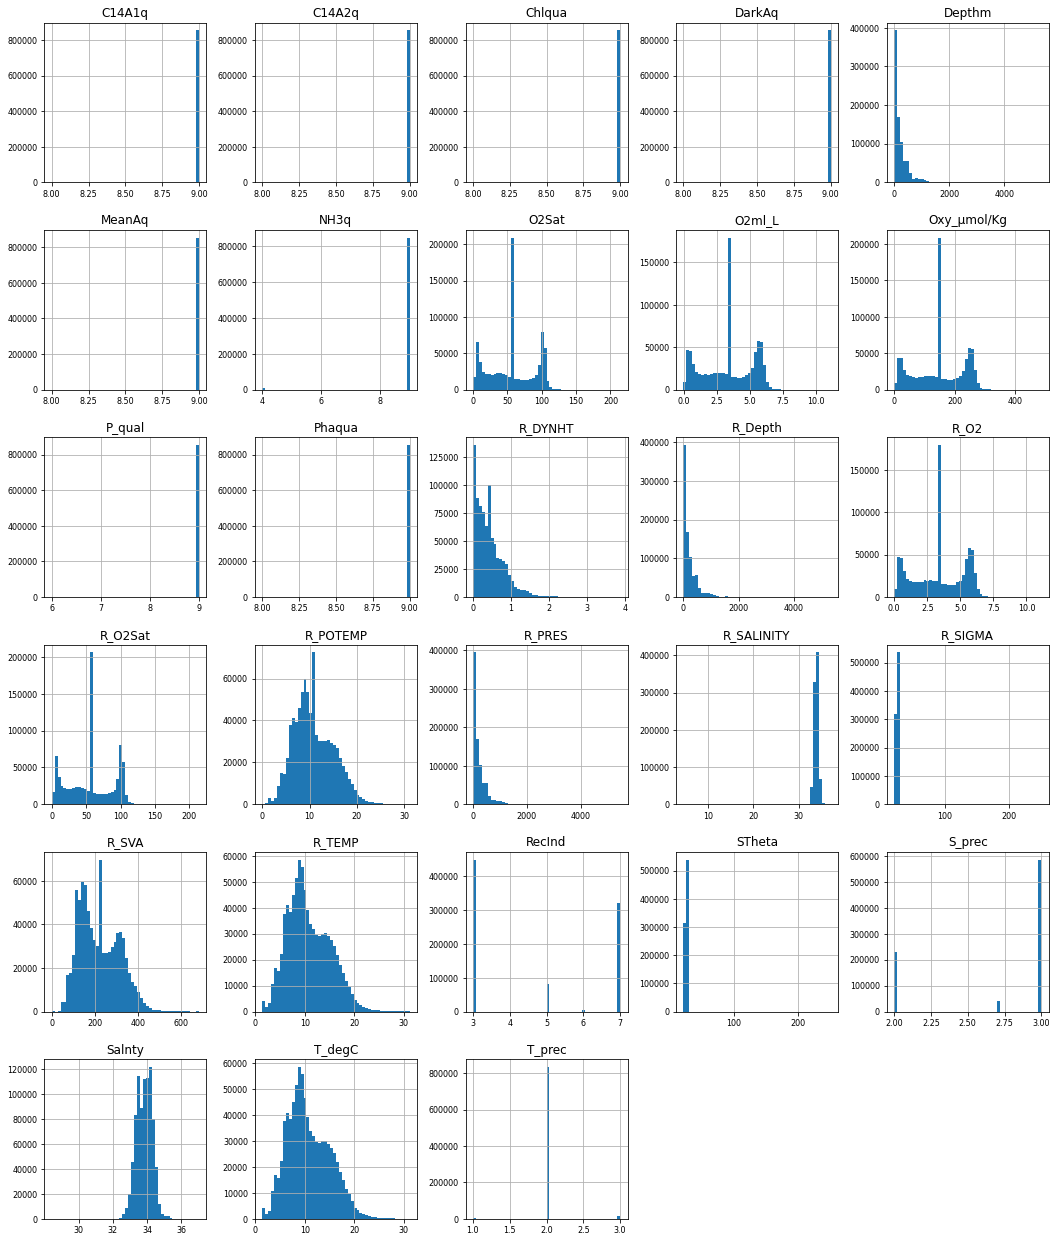

In [17]:
dataset_numbers =dataset.select_dtypes(include=['float','int'])
dataset_numbers.hist(figsize=(18,22),bins=50,xlabelsize=8,ylabelsize=8)

## **No. 1**


StandardScaler(copy=True, with_mean=True, with_std=True)
MSE (Mean Squared Error) 7.866288911708835e-07
MAE (Mean Absolute Error) 0.00011805086363252679
r^2 score 0.9999999562639367
RMSE (Root Mean Squared Error 0.0008869210174366619


/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)



PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
MSE (Mean Squared Error) 0.08565124716859975
MAE (Mean Absolute Error) 0.12509465846630982
r^2 score 0.9952378454255261
RMSE (Root Mean Squared Error 0.29266234327053375

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=100,
                    output_distribution='uniform', random_state=10,
                    subsample=100000)
MSE (Mean Squared Error) 0.3533979967071984
MAE (Mean Absolute Error) 0.39894101283178107
r^2 score 0.9803512973568694
RMSE (Root Mean Squared Error 0.5944728729784047

MinMaxScaler(copy=True, feature_range=(0, 1))
MSE (Mean Squared Error) 7.866288911697508e-07
MAE (Mean Absolute Error) 0.0001180508637396329
r^2 score 0.9999999562639367
RMSE (Root Mean Squared Error 0.0008869210174360234

MaxAbsScaler(copy=True)
MSE (Mean Squared Error) 7.866288911715542e-07
MAE (Mean Absolute Error) 0.00011805086419861
r^2 score 0.9999999562639367
RMSE (Root Mean Squared Error 0.0008869

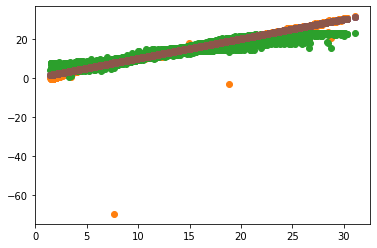

In [18]:
scale=[StandardScaler(),PowerTransformer(method='yeo-johnson'),QuantileTransformer(n_quantiles=100, random_state=10),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]
# PowerTransformer(method='box-cox'),

for index,value in enumerate(scale):
  scaler = value
  feature_used= dataset.drop(['T_degC'],axis=1)
  label = dataset['T_degC']
  feature_scaled =scaler.fit_transform(feature_used.values)
  feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)

  Linear_reg = LinearRegression()
  Linear_reg.fit(feature_train, label_train)
  predictions = Linear_reg.predict(feature_test)

  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print("\n{}".format(value))
  print("MSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  plt.scatter(label_test, predictions)

## **No. 2**

In [19]:
scaler = preprocessing.StandardScaler()
feature_used= dataset.drop(['T_degC'],axis=1)
label = dataset['T_degC']
feature_scaled =scaler.fit_transform(feature_used.values)
feature_train, feature_test,label_train, label_test = train_test_split(feature_scaled, label, test_size=0.25,random_state=10)


 <class 'sklearn.linear_model._base.LinearRegression'>

MSE (Mean Squared Error) 7.866288911708835e-07
MAE (Mean Absolute Error) 0.00011805086363252679
r^2 score 0.9999999562639367
RMSE (Root Mean Squared Error 0.0008869210174366619


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-4a6602b707f7>", line 11, in <module>
    reg.fit(feature_train, label_train)
  File "/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py", line 383, in fit
    for i, t in enumerate(trees))
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 1032, in __call__
    while self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/usr/local/lib/python3.6/dist-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/usr/local/lib/python3.6/dist-packages/joblib/_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "/usr/local/lib/pytho

KeyboardInterrupt: ignored

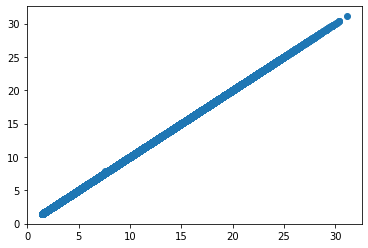

In [20]:
algorithm =[LinearRegression,RandomForestRegressor,xgb.XGBRegressor,SVR,KNeighborsRegressor]
n=[1,3,5,7,9,11,13,15]
kernel=['linear', 'poly', 'rbf']
for index, value in enumerate(algorithm):
  if value == LinearRegression:
    Linear_reg = LinearRegression()
    Linear_reg.fit(feature_train, label_train)
    predictions = Linear_reg.predict(feature_test)
  if value == RandomForestRegressor:
    reg = RandomForestRegressor(max_depth=10, random_state=10)
    reg.fit(feature_train, label_train)
    predictions = reg.predict(feature_test)
  if value == xgb.XGBRegressor:
    xgb_reg = xgb.XGBRegressor(max_depth=3,n_estimators=125,colsample_bytree=1,learning_rate=0.27,objective='reg:squarederror')
    xgb_reg.fit(feature_train, label_train)
    predictions = xgb_reg.predict(feature_test)
  if value == SVR:
    for i,v in enumerate(kernel):
      reggression = SVR(kernel=v)
      reggression.fit(feature_train, label_train)
      predictions = reggression.predict(feature_test)

      mse = mean_squared_error(label_test, predictions)
      mae = mean_absolute_error(label_test, predictions)
      r2 = r2_score(label_test, predictions)
      print('\n{} kernel={}'.format(value,v))
      print("MSE (Mean Squared Error) = {} ".format(mse))
      print("MAE (Mean Absolute Error) = {} ".format(mae))
      print("r^2 score  = {} ".format(r2))
      print('RMSE (Root Mean Squared Error = {}  \n'.format(np.sqrt(mean_squared_error(label_test, predictions))))
      plt.scatter(label_test, predictions)
    continue
  if value == KNeighborsRegressor:
    for i,v in enumerate(n):
      reggression = KNeighborsRegressor(n_neighbors=v)
      reggression.fit(feature_train, label_train)
      predictions = reggression.predict(feature_test)

      mse = mean_squared_error(label_test, predictions)
      mae = mean_absolute_error(label_test, predictions)
      r2 = r2_score(label_test, predictions)
      print('\n{} n_neighbors={}'.format(value,v))
      print("MSE (Mean Squared Error) = {} ".format(mse))
      print("MAE (Mean Absolute Error) = {} ".format(mae))
      print("r^2 score  = {}".format(r2))
      print('RMSE (Root Mean Squared Error = {}\n'.format(np.sqrt(mean_squared_error(label_test, predictions))))
      plt.scatter(label_test, predictions)
    continue

  mse = mean_squared_error(label_test, predictions)
  mae = mean_absolute_error(label_test, predictions)
  r2 = r2_score(label_test, predictions)
  print('\n',value)
  print("\nMSE (Mean Squared Error)", mse)
  print("MAE (Mean Absolute Error)", mae)
  print("r^2 score", r2)
  print('RMSE (Root Mean Squared Error', np.sqrt(mean_squared_error(label_test, predictions)))
  plt.scatter(label_test, predictions)